In [31]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

In [32]:
train = pd.read_csv("datasets/bicycle/train.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

In [33]:
test = pd.read_csv("datasets/bicycle/test.csv", parse_dates=["datetime"])
test.shape

(6493, 9)

In [34]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["hour"] = train["datetime"].dt.hour
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 16)

In [35]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["hour"] = test["datetime"].dt.hour
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

(6493, 13)

In [36]:
# 연속형 feature와 범주형 feature
# 범주형 feature의 type을 category로 변경 해 준다.
categorical_feature_names = ["season","holiday","workingday","weather",
                             "dayofweek","month","year","hour"]

In [37]:
type(train["season"])

pandas.core.series.Series

In [38]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4,5


In [39]:
for var in categorical_feature_names:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [40]:
train["season"].dtype

CategoricalDtype(categories=[1, 2, 3, 4], ordered=False)

In [41]:
feature_names = ["season", "weather", "temp", "atemp", "humidity",
                 "year", "hour", "dayofweek", "holiday", "workingday"
                ]

feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [42]:
len(feature_names)

10

In [43]:
train.shape

(10886, 16)

In [44]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4,5


In [45]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 10)


,season,weather,temp,atemp,humidity,year,hour,dayofweek,holiday,workingday
0,1,1,9.84,14.395,81,2011,0,5,0,0
1,1,1,9.02,13.635,80,2011,1,5,0,0
2,1,1,9.02,13.635,80,2011,2,5,0,0
3,1,1,9.84,14.395,75,2011,3,5,0,0
4,1,1,9.84,14.395,75,2011,4,5,0,0


In [46]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 10)


,season,weather,temp,atemp,humidity,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,2011,0,3,0,1
1,1,1,10.66,13.635,56,2011,1,3,0,1
2,1,1,10.66,13.635,56,2011,2,3,0,1
3,1,1,10.66,12.880,56,2011,3,3,0,1
4,1,1,10.66,12.880,56,2011,4,3,0,1


In [47]:
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [48]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convertExp=True):

    if convertExp:
        predicted_values = np.exp(predicted_values),
        actual_values = np.exp(actual_values)
        
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

# 선형회귀 모델 Linear Regression Model
선형회귀 또는 최소제곱법은 가장 간단하고 오래된 회귀용 선형 알고리즘

선형회귀는 예측과 훈련 세트에 있는 타깃 y사이의 평균제곱오차(MSE)를 최소화하는 파라미터 w와 b를 찾는다.

매개변수가 없는 것이 장점이지만, 모델의 복잡도를 제어할 수 없다는 단점이 있다.

아래 위키피디아에서 가져 온 그래프에서 파란선이 선형회귀 모델을 나타내고 빨간점들이 훈련데이터를 나타낸다.


(array([ 237.,  462.,  625.,  626.,  805., 1076., 1768., 2544., 2058.,
         685.]),
 array([0.69314718, 1.31238343, 1.93161968, 2.55085593, 3.17009218,
        3.78932843, 4.40856467, 5.02780092, 5.64703717, 6.26627342,
        6.88550967]),
 <a list of 10 Patch objects>)

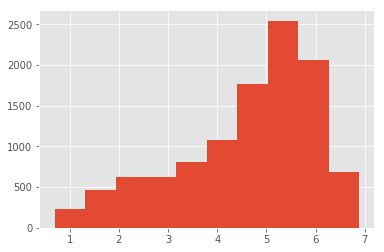

In [49]:
#plt.hist(y_train)
plt.hist(np.log1p(y_train))

In [98]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 선형회귀 모델을 초기화
lModel = LinearRegression()

# 모델을 학습시킨다.
y_train_log = np.log1p(y_train)
lModel.fit(X_train, y_train_log)

# 예측하고 정확도를 평가한다.
preds = lModel.predict(X_train)
print ("RMSLE Value For Linear Regression: ",
       rmsle(np.exp(y_train_log)-1,np.exp(preds)-1, False))

RMSLE Value For Linear Regression:  1.0183344146540017


In [99]:
(np.exp(y_train_log-1)) - (y_train) < 0.001

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
         ... 
10856    True
10857    True
10858    True
10859    True
10860    True
10861    True
10862    True
10863    True
10864    True
10865    True
10866    True
10867    True
10868    True
10869    True
10870    True
10871    True
10872    True
10873    True
10874    True
10875    True
10876    True
10877    True
10878    True
10879    True
10880    True
10881    True
10882    True
10883    True
10884    True
10885    True
Name: count, Length: 10886, dtype: bool

In [100]:
np.exp(y_train_log-1) - np.exp(preds-1)

0          2.489654
1         11.005900
2          7.640164
3         -0.380212
4         -5.368144
5         -5.690489
6         -5.573098
7         -5.049622
8         -5.745850
9         -5.744029
10        -0.132271
11         8.314379
12        13.630447
13        12.488156
14        14.574119
15        16.262401
16        10.227269
17        -2.781020
18       -13.953813
19       -16.037763
20       -18.842544
21       -22.942994
22       -24.973933
23       -32.819311
24         1.566735
25         1.684540
26        -1.142654
27        -3.643480
28        -5.391838
29        -8.970186
            ...    
10856     83.324261
10857      8.626007
10858    -14.677016
10859    -66.375621
10860    -90.303161
10861   -127.334024
10862      2.335980
10863     -7.756703
10864    -13.088097
10865    -10.869490
10866    -10.675008
10867     -4.554104
10868     24.568350
10869    114.505252
10870    232.449433
10871     92.543323
10872     28.867892
10873     21.767912
10874     29.602219


In [101]:
preds_df = pd.DataFrame(preds)
y_df = pd.DataFrame(y_train_log)
y_preds = pd.DataFrame()
y_preds["y"] = np.exp(y_train_log)-1
y_preds["preds"] = np.exp(preds)-1

In [102]:
y_preds.head()

,y,preds
0,16.0,9.232420
1,40.0,10.082861
2,32.0,11.231881
3,13.0,14.033523
4,1.0,15.592129


In [103]:
y_pred_sorted = y_preds.sort_values(by="preds")
y_pred_sorted.head()

,y,preds
1020,4.0,4.657554
1021,2.0,5.244103
643,16.0,5.841831
454,2.0,6.384489
255,7.0,6.392969


In [104]:
range(10885)

range(0, 10885)

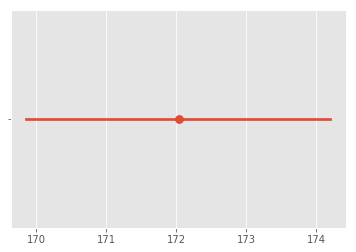

In [105]:
sns.pointplot(y_pred_sorted)

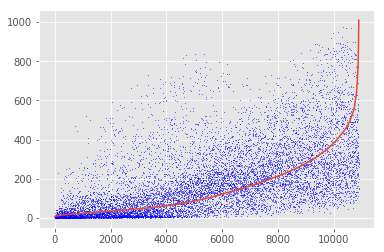

In [106]:
# Linear regression pred와 실제 데이터 비교
#plt.scatter(range(10886),y_pred_sorted.y)
plt.plot(range(10886), y_pred_sorted.preds)
plt.scatter(range(10886), y_pred_sorted.y, c='blue', s=0.1)

{'max_iter': 3000, 'alpha': 0.01}
RMSLE Value For Ridge Regression:  0.9803727821457642


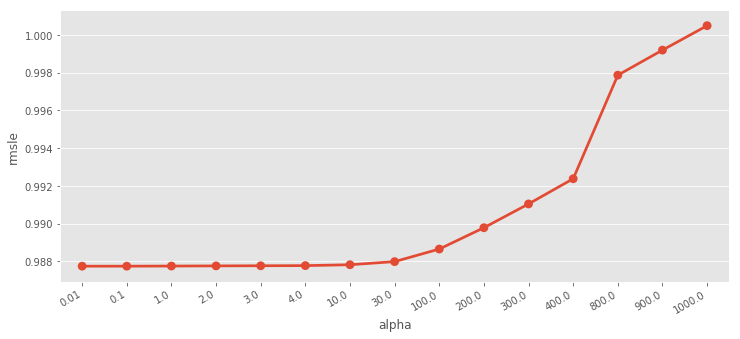

In [129]:
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.01, 0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)

y_train_log = np.log1p(y_train)
grid_ridge_m.fit( X_train, y_train_log )
preds_ridge = grid_ridge_m.predict(X_train)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ", rmsle(np.exp(y_train_log),np.exp(preds), False))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_ridge_m.grid_scores_)
df["alpha"] = df["parameters"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_validation_score"].apply(lambda x:-x)

plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

In [130]:
df["rmsle"]

0     0.987749
1     0.987749
2     0.987756
3     0.987764
4     0.987771
5     0.987779
6     0.987825
7     0.987990
8     0.988657
9     0.989786
10    0.991046
11    0.992382
12    0.997869
13    0.999196
14    1.000490
Name: rmsle, dtype: float64

In [93]:
preds_df = pd.DataFrame(preds)
y_df = pd.DataFrame(y_train_log)
y_preds_ridge = pd.DataFrame()
y_preds_ridge["y"] = np.exp(y_train_log)-1
y_preds_ridge["preds"] = np.exp(preds_ridge)-1

y_preds_ridge = y_preds_ridge.sort_values("preds")

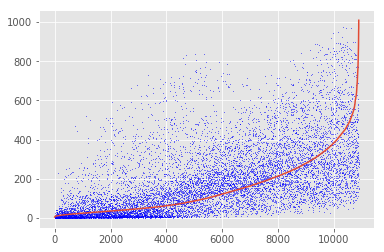

In [107]:
plt.plot(range(10886), y_preds_ridge["preds"])
plt.scatter(range(10886), y_preds_ridge["y"], c="blue", s=0.1)

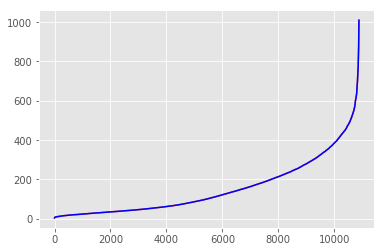

In [113]:
plt.plot(range(10886), y_preds_ridge["preds"])
plt.plot(range(10886), y_pred_sorted["preds"], c="blue")

In [124]:
y_pred_sorted.sort_index(inplace=True)
y_preds_ridge.sort_index(inplace=True)
y_pred_sorted["preds"] == y_preds_ridge["preds"]

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
10856    False
10857    False
10858    False
10859    False
10860    False
10861    False
10862    False
10863    False
10864    False
10865    False
10866    False
10867    False
10868    False
10869    False
10870    False
10871    False
10872    False
10873    False
10874    False
10875    False
10876    False
10877    False
10878    False
10879    False
10880    False
10881    False
10882    False
10883    False
10884    False
10885    False
Name: preds, Length: 10886, dtype: bool

{'max_iter': 3000, 'alpha': 0.00125}
RMSLE Value For Lasso Regression:  0.9803727821457642


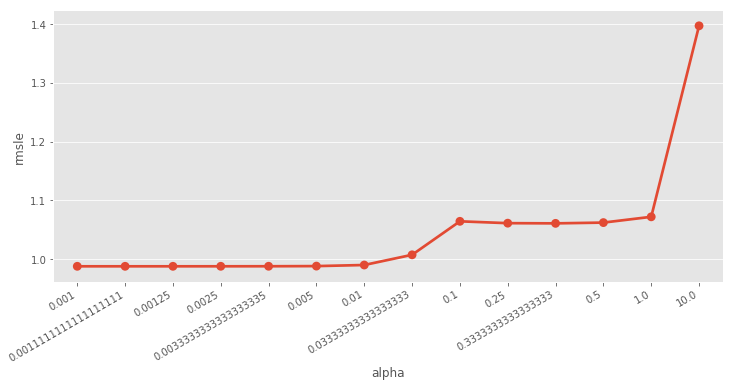

In [126]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
y_train_log = np.log1p(y_train)
grid_lasso_m.fit( X_train , y_train_log )
preds = grid_lasso_m.predict(X_train)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(y_train_log),np.exp(preds),False))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_lasso_m.grid_scores_)
df["alpha"] = df["parameters"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_validation_score"].apply(lambda x:-x)

plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

In [127]:
df["rmsle"]

0     1.397134
1     1.071961
2     1.062121
3     1.060826
4     1.061149
5     1.064287
6     1.007274
7     0.989920
8     0.988064
9     0.987804
10    0.987736
11    0.987714
12    0.987715
13    0.987715
Name: rmsle, dtype: float64

In [133]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(y_train)
rfModel.fit(X_train, y_train_log)

preds_rf = rfModel.predict(X_train)
score = rmsle(np.exp(y_train_log),np.exp(preds_rf),False)
print ("RMSLE Value For Random Forest: ",score)

RMSLE Value For Random Forest:  0.10721479683644673


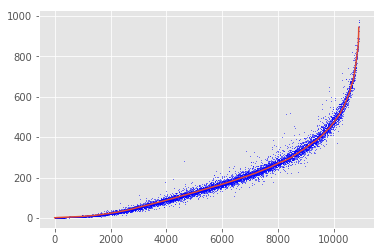

In [137]:
y_preds_rf = pd.DataFrame()
y_preds_rf["y"] = np.exp(y_train_log)-1
y_preds_rf["preds"] = np.exp(preds_rf)-1

y_preds_rf_sorted = y_preds_rf.sort_values("preds")

plt.plot(range(10886), y_preds_rf_sorted["preds"])
plt.scatter(range(10886), y_preds_rf_sorted["y"], c="blue", s=0.1)